# Import Package & Data

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import PowerTransformer, FunctionTransformer, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from xgboost import XGBRegressor

pd.set_option('display.float_format', lambda x: '%.4f' % x)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [413]:
df = pd.read_csv("data/data.csv", parse_dates=["date"])
df_model = df.copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0000,3.0000,1.5000,1340,7912,1.5000,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0000,5.0000,2.5000,3650,9050,2.0000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0000,3.0000,2.0000,1930,11947,1.0000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0000,3.0000,2.2500,2000,8030,1.0000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0000,4.0000,2.5000,1940,10500,1.0000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


- **date** : The day when the plot was made for auction
- **price** : price of the plot
- **bedrooms** : number of bedrooms in the plot
- **bathrooms** : number of bathrooms in the plot
- **sqft_living** : Square Feet area of the living plot
- **sqft_lot** : Square Feet are of the living plot
- **floors** : Number of floors in the plot
- **waterfront** : If the plot has water front or not
- **view** : The view condition of the plot
- **condition** : The condition of the plot
- **sqft_above** : Square Feet area of the above plot
- **sqft_basement** : Square Feet area of the beasement in the plot
- **yr_built** : The year in which the plot was built
- **yr_renovated** : The year in which the plot was renovated
- **street** : The address of the plot
- **city** : The city in which the plot is located
- **statezip** : The zip code of the plot
- **country** : The state in which the plot is located

# Data Cleaning & EDA

### Melihat Informasi Data

In [414]:
print("Data mempunyai {} baris dan {} kolom".format(df.shape[0],df.shape[1]))

Data mempunyai 4600 baris dan 18 kolom


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [416]:
kategorik = df.select_dtypes(include=['object']).columns
numerik = df.select_dtypes(exclude=['object', 'datetime']).columns

print('Kolom Kategorik', '\n', kategorik, '\n')
print('Kolom Numerik', '\n', numerik)

Kolom Kategorik 
 Index(['street', 'city', 'statezip', 'country'], dtype='object') 

Kolom Numerik 
 Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')


In [417]:
print(f"Jumlah Data Unik pada Setiap Kolom Numerik\n{df[numerik].nunique()}'\n")
print(f"Jumlah Data Unik pada Setiap Kolom Kategorik\n{df[kategorik].nunique()}")

Jumlah Data Unik pada Setiap Kolom Numerik
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
dtype: int64'

Jumlah Data Unik pada Setiap Kolom Kategorik
street      4525
city          44
statezip      77
country        1
dtype: int64


In [418]:
print(f'Total Data pada Kolom yang Memiliki Missing Value\n{df.isnull().sum()}')
print(f"\nTotal Duplikat Data {df.drop(columns=['date']).duplicated().sum()}")

Total Data pada Kolom yang Memiliki Missing Value
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Total Duplikat Data 0


In [419]:
print("Jenis kategori pada kolom kategorik:")
for col in df.select_dtypes(include=['object']):
    print(col,":", df[col].unique(), '\n')

Jenis kategori pada kolom kategorik:
street : ['18810 Densmore Ave N' '709 W Blaine St' '26206-26214 143rd Ave SE' ...
 '759 Ilwaco Pl NE' '5148 S Creston St' '18717 SE 258th St'] 

city : ['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton'] 

statezip : ['WA 98133' 'WA 98119' 'WA 98042' 'WA 98008' 'WA 98052' 'WA 98115'
 'WA 98038' 'WA 98045' 'WA 98155' 'WA 98105' 'WA 98074' 'WA 98106'
 'WA 98007' 'WA 98092' 'WA 98198' 'WA 98006' 'WA 98102' 'WA 98011'
 'WA 98125' 'WA 98003' 'WA 98136' 'WA 98033' 'WA 9

In [420]:
print("Jenis kategori pada kolom kategorik:")
for col in df.columns[df.nunique() <= 30].tolist():
    print(col, ":", ' | '.join(map(str, df[col].unique())), '\n')

Jenis kategori pada kolom kategorik:
bedrooms : 3.0 | 5.0 | 4.0 | 2.0 | 6.0 | 7.0 | 9.0 | 1.0 | 8.0 | 0.0 

bathrooms : 1.5 | 2.5 | 2.0 | 2.25 | 1.0 | 1.75 | 2.75 | 3.0 | 3.25 | 3.5 | 8.0 | 4.25 | 4.0 | 3.75 | 5.0 | 4.5 | 5.75 | 1.25 | 6.5 | 4.75 | 0.75 | 5.25 | 5.5 | 6.25 | 0.0 | 6.75 

floors : 1.5 | 2.0 | 1.0 | 2.5 | 3.0 | 3.5 

waterfront : 0 | 1 

view : 0 | 4 | 1 | 2 | 3 

condition : 3 | 5 | 4 | 2 | 1 

country : USA 



### Melihat Deskripsi Data

In [421]:
df[numerik].describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0000,551962.9885,563834.7025,0.0000,322875.0000,460943.4615,654962.5000,26590000.0000
bedrooms,4600.0000,3.4009,0.9088,0.0000,3.0000,3.0000,4.0000,9.0000
bathrooms,4600.0000,2.1608,0.7838,0.0000,1.7500,2.2500,2.5000,8.0000
sqft_living,4600.0000,2139.3470,963.2069,370.0000,1460.0000,1980.0000,2620.0000,13540.0000
sqft_lot,4600.0000,14852.5161,35884.4361,638.0000,5000.7500,7683.0000,11001.2500,1074218.0000
floors,4600.0000,1.5121,0.5383,1.0000,1.0000,1.5000,2.0000,3.5000
waterfront,4600.0000,0.0072,0.0844,0.0000,0.0000,0.0000,0.0000,1.0000
view,4600.0000,0.2407,0.7784,0.0000,0.0000,0.0000,0.0000,4.0000
condition,4600.0000,3.4517,0.6772,1.0000,3.0000,3.0000,4.0000,5.0000
sqft_above,4600.0000,1827.2654,862.1690,370.0000,1190.0000,1590.0000,2300.0000,9410.0000


In [422]:
df[kategorik].describe().T

,count,unique,top,freq
street,4600,4525,2520 Mulberry Walk NE,4
city,4600,44,Seattle,1573
statezip,4600,77,WA 98103,148
country,4600,1,USA,4600


In [423]:
print(f'Jumlah data dengan harga rumah 0 : {df[df["price"] == 0].shape[0]}')
filter_price = df[df["price"] <= 0].index
df.drop(filter_price, inplace=True)

print("Data mempunyai {} baris dan {} kolom".format(df.shape[0],df.shape[1]))

Jumlah data dengan harga rumah 0 : 49
Data mempunyai 4551 baris dan 18 kolom


<b>Menghapus data dengan harga rumah 0</b>

In [424]:
index = df[df["price"] == 0].index
df.drop(index, inplace=True)
print("Data menjadi {} baris".format(df.shape[0]))

Data menjadi 4551 baris


<b>Melihat kembali deskripsi data</b>

In [425]:
kolom_numerik_kategorik = df.columns[(df.nunique() <= 30) & (df.dtypes != 'object')].tolist()
kategorik_dump = df.select_dtypes(include=['object']).columns.tolist()+ kolom_numerik_kategorik
numerik_dump = df.columns[(~df.columns.isin(kolom_numerik_kategorik)) & (df.dtypes != 'object') & (df.dtypes != 'datetime64[ns]')].tolist()
print('Kolom Kategorik', '\n', kategorik_dump, '\n')
print('Kolom Numerik', '\n', numerik_dump)

Kolom Kategorik 
 ['street', 'city', 'statezip', 'country', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition'] 

Kolom Numerik 
 ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


In [426]:
df[numerik_dump].describe().T.loc[:, ['min', 'max', 'mean', 'std', '50%']].sort_values(by='min')

,min,max,mean,std,50%
sqft_basement,0.0000,4820.0000,310.1505,461.9876,0.0000
yr_renovated,0.0000,2014.0000,808.5641,979.4215,0.0000
sqft_living,370.0000,13540.0000,2132.3722,955.9497,1970.0000
sqft_above,370.0000,9410.0000,1822.2217,854.4529,1590.0000
sqft_lot,638.0000,1074218.0000,14835.2806,35964.0778,7680.0000
yr_built,1900.0000,2014.0000,1970.7956,29.7601,1976.0000
price,7800.0000,26590000.0000,557905.8991,563929.8713,465000.0000


In [427]:
dump = df.copy()

for kolom in kategorik_dump:
    if kolom in kolom_numerik_kategorik:
        dump[kolom] = dump[kolom].astype('int64')
    dump[kolom] = dump[kolom].astype('category')

dump[kategorik_dump].describe().T.loc[:, ['unique', 'top', 'freq']].sort_values(by='unique')

,unique,top,freq
country,1,USA,4551
waterfront,2,0,4521
floors,3,1,2590
view,5,0,4103
condition,5,3,2851
bathrooms,8,2,2292
bedrooms,10,3,2025
city,44,Seattle,1561
statezip,77,WA 98103,148
street,4476,2520 Mulberry Walk NE,4


# Visualisasi Data

### Melihat Histogram Kolom Numerik

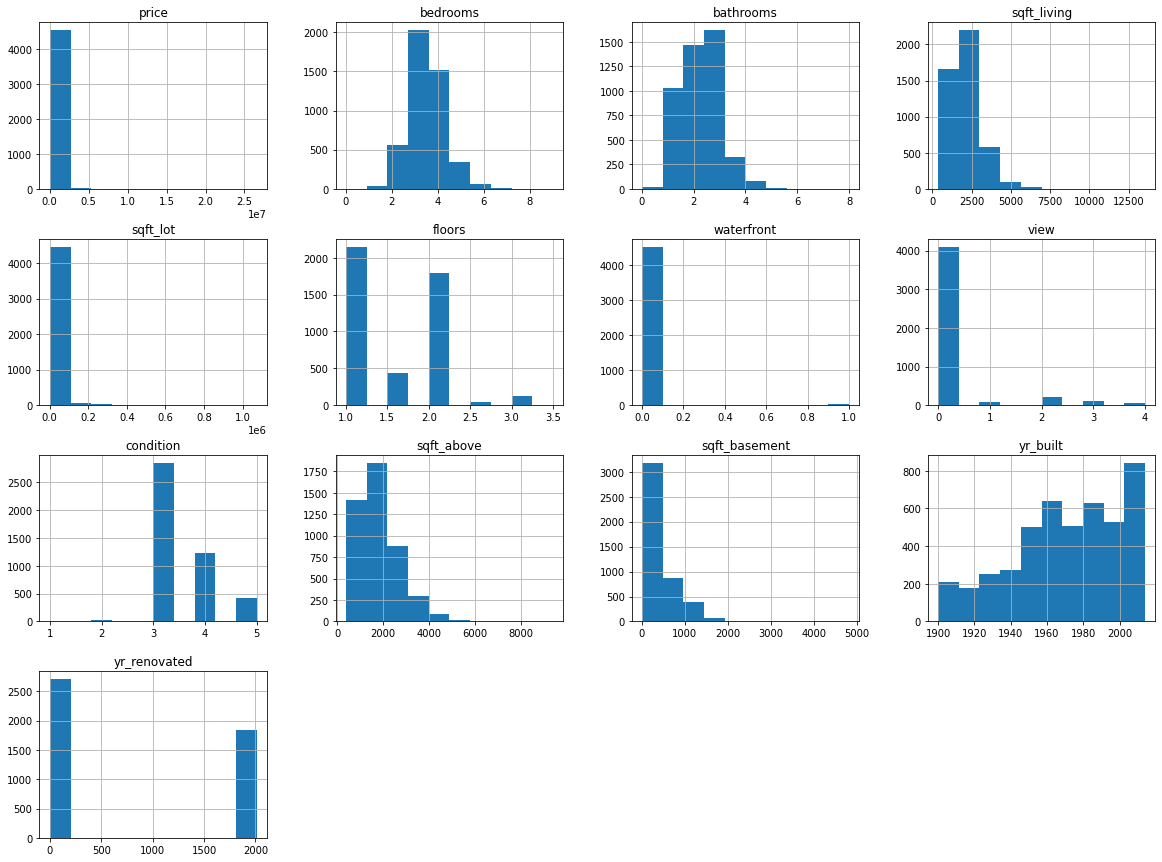

In [428]:
df[numerik].hist(figsize= (20, 15));

### Melihat Pengaruh Kolom Numerik Terhadap Harga **[kolom price]**

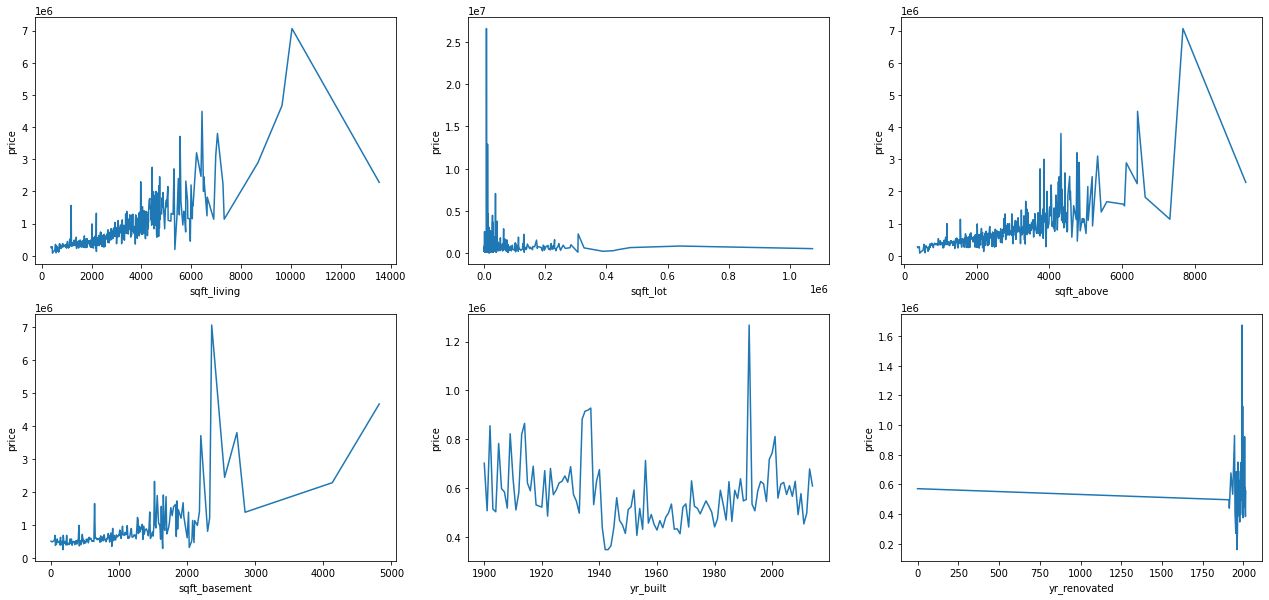

In [429]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))

kolom = df.columns[df.columns.str.contains('sqft|yr', case=False)]
c = 0

for a in range(0, 2):
    for b in range(0, 3):
        if c < len(kolom):
            sns.lineplot(x=kolom[c], y='price', data=df, ci=None, ax=axes[a, b])
            c+=1
        else:
            # Menghapus subplot yang tidak digunakan
            fig.delaxes(axes[a, b])

# Menambahkan jarak antara subplot    
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

### Melihat Jumlah Data Kolom Kategorik

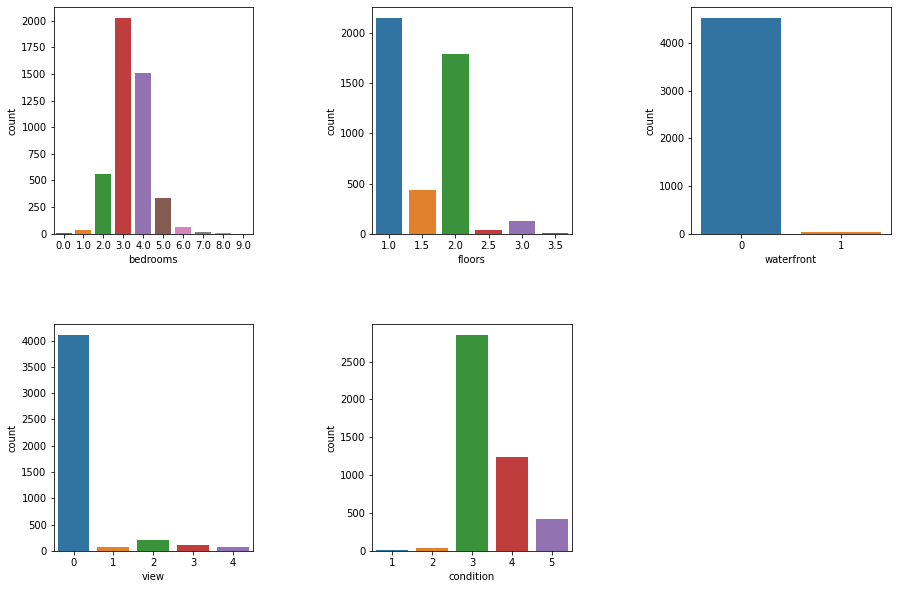

In [430]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

kolom = df.drop(columns=['country']).nunique()[df.nunique() <= 10].index.tolist()
c = 0

for a in range(0, 2):
    for b in range(0, 3):
        if c < len(kolom):
            sns.countplot(x=kolom[c], data=df, ax=axes[a, b])
            c+=1
        else:
            # Menghapus subplot yang tidak digunakan
            fig.delaxes(axes[a, b])

# Menambahkan jarak antara subplot    
plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.show()

### Melihat Pengaruh Kolom Kategorik Terhadap Harga **[kolom price]**

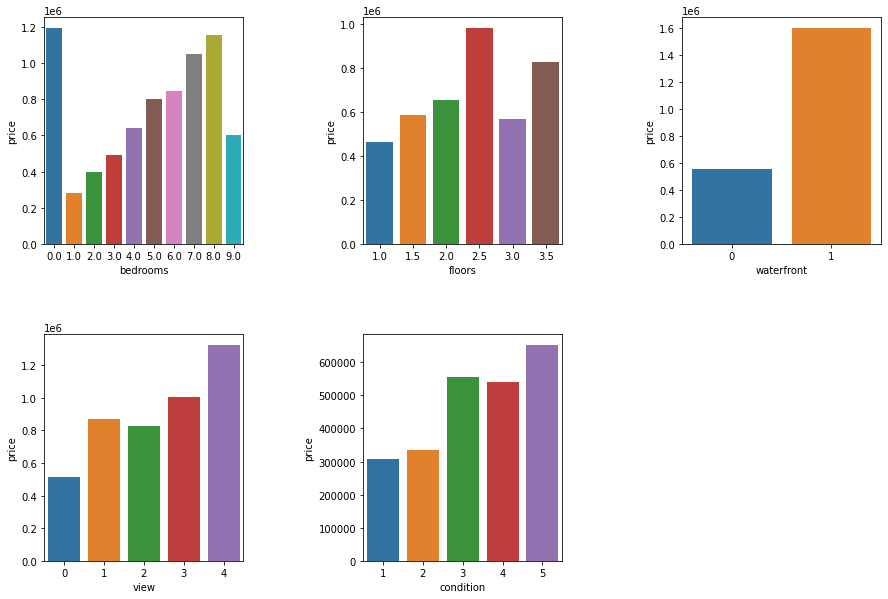

In [431]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

kolom = df.drop(columns=['country']).nunique()[df.nunique() <= 10].index.tolist()
c = 0

for a in range(0, 2):
    for b in range(0, 3):
        if c < len(kolom):
            sns.barplot(x=kolom[c], y='price', data=df, ci=None, ax=axes[a, b])
            c+=1
        else:
            # Menghapus subplot yang tidak digunakan
            fig.delaxes(axes[a, b])

# Menambahkan jarak antara subplot    
plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.show()

### Melihat Outliers dan Distribusi Data

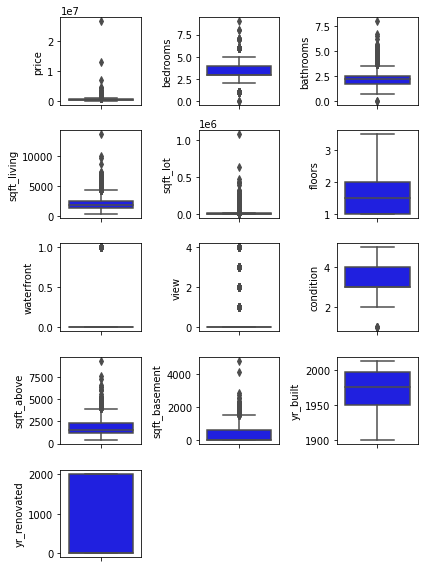

In [432]:
plt.figure(figsize=(6, 8))
for i in range(0, len(numerik)):
    plt.subplot(5, len(numerik)//4, i+1)
    sns.boxplot(y=df[numerik[i]], color='blue', orient='v')
    plt.tight_layout()

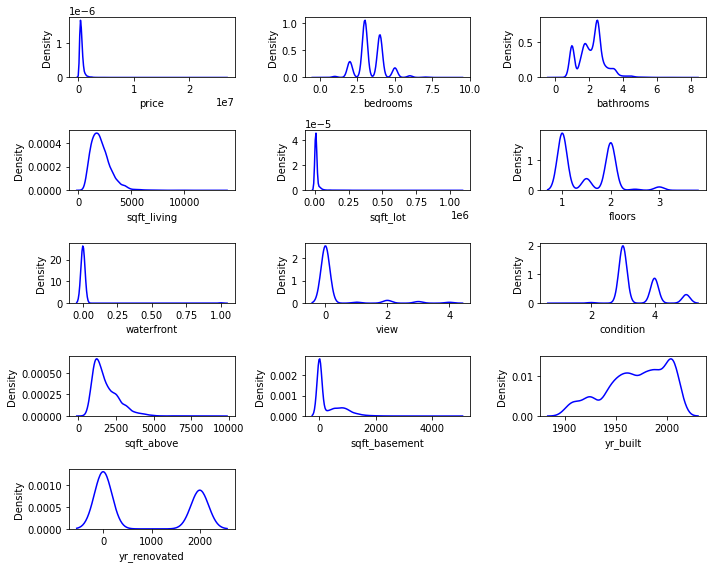

In [433]:
plt.figure(figsize=(10, 8))
for i in range(0, len(numerik)):
    plt.subplot(5, len(numerik)//4, i+1)
    sns.kdeplot(df[numerik[i]], color='blue')
    plt.tight_layout()

#### Melihat Kolom Numerik yang Memiliki Jumlah Data Unik > 10

In [434]:
df[numerik].nunique()

price            1740
bedrooms           10
bathrooms          26
sqft_living       561
sqft_lot         3087
floors              6
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
dtype: int64

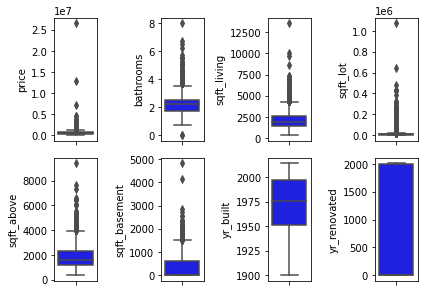

In [435]:
num = df.select_dtypes(exclude=['object', 'datetime']).columns[df.select_dtypes(exclude=['object', 'datetime']).nunique() > 10]

plt.figure(figsize=(6, 8))
for i in range(0, len(num)):
    plt.subplot(4, len(num)//2, i+1)
    sns.boxplot(y=df[num[i]], color='blue', orient='v')
    plt.tight_layout()

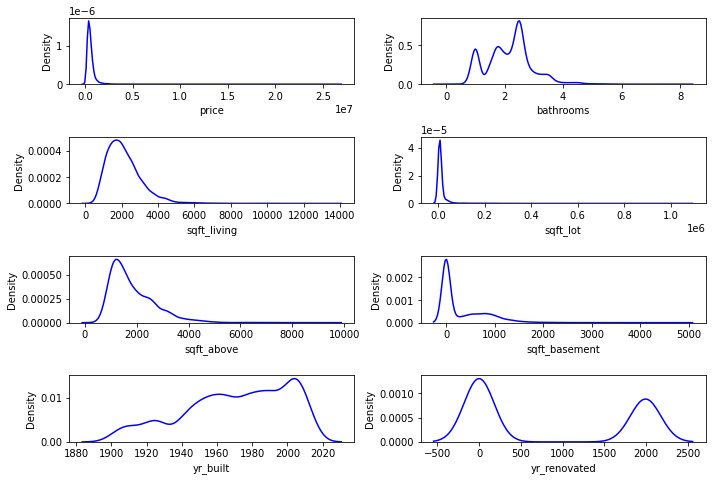

In [436]:
plt.figure(figsize=(10, 8))
for i in range(0, len(num)):
    plt.subplot(5, len(num)//4, i+1)
    sns.kdeplot(df[num[i]], color='blue')
    plt.tight_layout()

### Melihat Correlation Matrix

<AxesSubplot:>

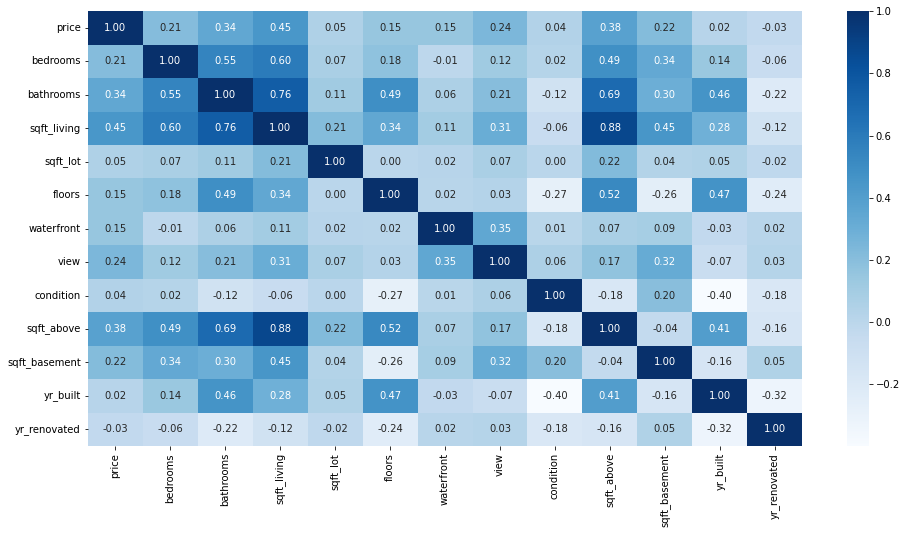

In [437]:
korelasi = df.select_dtypes(exclude=['object', 'datetime']).columns

plt.figure(figsize=(16, 8))
sns.heatmap(df[korelasi].corr(), cmap='Blues', annot=True, fmt='.2f')

In [438]:
df.corr()['price'].sort_values(ascending=False)

price            1.0000
sqft_living      0.4455
sqft_above       0.3807
bathrooms        0.3411
view             0.2426
sqft_basement    0.2178
bedrooms         0.2102
floors           0.1528
waterfront       0.1501
sqft_lot         0.0513
condition        0.0389
yr_built         0.0218
yr_renovated    -0.0290
Name: price, dtype: float64

# Data Preprocessing 

### Feature Construction

In [439]:
print(f"Data unik kolom yr_renovated:\n{df['yr_renovated'].unique()}\n")
print(f"Data unik kolom yr_built:\n{df['yr_built'].unique()}")

Data unik kolom yr_renovated:
[2005    0 1992 1994 2010 1988 2009 1969 2000 1979 1989 2014 1999 2003
 1983 1997 1912 1923 1954 2011 2001 2013 2006 1972 1985 1998 2004 1958
 2008 1970 1982 1986 1996 2002 1971 1990 1956 1945 1984 2012 1993 2007
 1981 1974 1963 1968 1995 1934 1953 1966 1955 1987 1960 1978 1980 1948
 1991 1913 1977]

Data unik kolom yr_built:
[1955 1921 1966 1963 1976 1938 1989 1985 1945 1948 1909 1980 1939 1965
 1956 1997 1987 1983 1923 1954 2005 1991 1959 1920 1979 1951 1967 2004
 2014 1995 1944 1992 1957 1978 1974 1950 1990 1949 1968 1977 1996 2001
 2000 1929 2006 2008 2009 2012 2013 2007 1986 1973 1988 1900 1928 1982
 1960 2003 1998 1942 1908 1958 1971 1975 1961 1924 1902 1962 1953 1999
 1994 1930 1984 2010 1912 1947 1916 1940 1970 1952 1964 1926 1905 1969
 1903 1943 1993 1946 1910 1904 1981 1906 1922 2011 2002 1917 1913 1914
 1937 1925 1932 1918 1972 1941 1919 1936 1911 1927 1931 1901 1907 1915
 1935 1933 1934]


In [440]:
df['renovation_age'] = df['yr_renovated'] - df['yr_built']
print(f"Data unik kolom renovation_age:\n{df['renovation_age'].unique()}")

Data unik kolom renovation_age:
[   50 -1921 -1966 -1963    16    56 -1976 -1989 -1985    65    46    79
 -1980    54    30 -1965 -1956 -1997    13    26 -1923    25 -2005 -1991
 -1987 -1948 -1920    35    48 -1967    -1 -2014 -1995 -1944 -1992 -1957
    22 -1974    33    19 -1949    29 -1977 -1996 -2001 -2000 -1929 -2006
 -2008 -2009  -100   -90 -2007 -1986 -1973 -1988   105    41 -2003    40
     8 -1942 -1979 -1908    14 -1990    36    89 -1971 -1975    43    45
    87 -1960 -1902 -1962    51 -1999 -1994 -1945 -1930    42 -1984    49
    27 -2010    93    70    57 -1938    63    44 -1978    64    61 -1928
    55 -1950 -1964    77 -1982   108 -1903 -1959    59 -1993    71 -1910
 -1904    12    32 -1947    84    34 -2011 -2002 -1917    31    53 -1968
    96 -1905 -1912    52 -1958    81    28 -1925 -1952 -1918 -1940 -1972
    88 -1941 -1926 -1983    91 -1953 -1969    67    86 -1943    60 -1936
 -1981    73 -1927 -1931 -1951    95 -1937    68    39    75 -1946 -1932
   102    82 -1970 

In [441]:
df[['yr_built', 'yr_renovated', 'renovation_age']].loc[(df['renovation_age'] > -1500) & (df['renovation_age'] < 0)].head()

,yr_built,yr_renovated,renovation_age
31,2004,2003,-1
60,2012,1912,-100
61,2013,1923,-90
64,2012,1912,-100
68,2004,2003,-1


Data diatas termasuk **Outliers**, karena tahun pembuatan rumah tidak mungkin kurang dari tahun renovasi,<br>
Maka akan dibuat kolom baru yaitu **age** yang merupakan selisih antara tahun pembuatan rumah dengan tahun renovasi.

In [442]:
print(f'Total data sebelumnya {df.shape[0]} Data')

filter_renovation = df.loc[(df['renovation_age'] > -1500) & (df['renovation_age'] < 0)].index
df.drop(index=filter_renovation, inplace=True)

print(f'Total data menjadi {df.shape[0]} Data, Setelah proses penghapusan data')

Total data sebelumnya 4551 Data
Total data menjadi 4358 Data, Setelah proses penghapusan data


In [443]:
sort = df['renovation_age'].unique()
sort.sort()
print(f'Melihat data unik kolom renovation_age:\n{sort}')

Melihat data unik kolom renovation_age:
[-2014 -2011 -2010 -2009 -2008 -2007 -2006 -2005 -2003 -2002 -2001 -2000
 -1999 -1998 -1997 -1996 -1995 -1994 -1993 -1992 -1991 -1990 -1989 -1988
 -1987 -1986 -1985 -1984 -1983 -1982 -1981 -1980 -1979 -1978 -1977 -1976
 -1975 -1974 -1973 -1972 -1971 -1970 -1969 -1968 -1967 -1966 -1965 -1964
 -1963 -1962 -1961 -1960 -1959 -1958 -1957 -1956 -1955 -1954 -1953 -1952
 -1951 -1950 -1949 -1948 -1947 -1946 -1945 -1944 -1943 -1942 -1941 -1940
 -1939 -1938 -1937 -1936 -1935 -1933 -1932 -1931 -1930 -1929 -1928 -1927
 -1926 -1925 -1924 -1923 -1922 -1921 -1920 -1918 -1917 -1916 -1915 -1913
 -1912 -1910 -1908 -1907 -1906 -1905 -1904 -1903 -1902 -1901 -1900     8
    12    13    14    15    16    17    19    21    22    24    25    26
    27    28    29    30    31    32    33    34    35    36    37    38
    39    40    41    42    43    44    45    46    47    48    49    50
    51    52    53    54    55    56    57    58    59    60    61    62
    63    6

In [444]:
df.loc[df['renovation_age'] < 0, 'renovation_age'] = 0

sort = df['renovation_age'].sort_values().unique()
print(f'Melihat data unik kolom renovation_age:\n{sort}')

Melihat data unik kolom renovation_age:
[  0   8  12  13  14  15  16  17  19  21  22  24  25  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  70  71  72  73  75  76  77  79  80  81  82  83  84  85  86  87
  88  89  91  92  93  94  95  96  97 100 101 102 103 104 105 108 109 114]


### Data Preparation

In [445]:
fitur = list(numerik) + list(kategorik) + ['renovation_age']
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'renovation_age'],
      dtype='object')

In [446]:
remove = ['price', 'date', 'statezip', 'country', 'street']
fitur = [item for item in fitur if item not in remove]
df[fitur].skew()

bedrooms          0.4708
bathrooms         0.6151
sqft_living       1.7810
sqft_lot         11.2161
floors            0.6050
waterfront       12.1402
view              3.3302
condition         0.8975
sqft_above        1.5272
sqft_basement     1.6380
yr_built         -0.4808
yr_renovated      0.4989
renovation_age    1.4038
dtype: float64

In [447]:
kolom = df[fitur].skew()[df[fitur].skew() > 1].index
print(f'Kolom yang memiliki nilai Skew > 1:\n{list(kolom)}')

Kolom yang memiliki nilai Skew > 1:
['sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'renovation_age']


In [448]:
df[fitur].describe().loc[['mean', '50%', 'min', 'max']]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,renovation_age
mean,3.3837,2.1325,2114.5665,15097.7561,1.4931,0.0067,0.2382,3.4693,1798.8173,315.7492,1969.2643,757.4963,16.8621
50%,3.0000,2.2500,1957.0000,7739.0000,1.5000,0.0000,0.0000,3.0000,1570.0000,0.0000,1973.0000,0.0000,0.0000
min,0.0000,0.0000,370.0000,638.0000,1.0000,0.0000,0.0000,1.0000,370.0000,0.0000,1900.0000,0.0000,0.0000
max,9.0000,8.0000,13540.0000,1074218.0000,3.5000,1.0000,4.0000,5.0000,9410.0000,4820.0000,2014.0000,2014.0000,114.0000


In [449]:
df[fitur].nunique()

bedrooms            10
bathrooms           26
sqft_living        544
sqft_lot          2954
floors               6
waterfront           2
view                 5
condition            5
sqft_above         488
sqft_basement      207
yr_built           112
yr_renovated        55
city                44
renovation_age      90
dtype: int64

In [450]:
numerik = df[fitur].nunique()[df[fitur].nunique() > 50].index
kategorik_num = [item for item in fitur if item not in numerik]

print('Kolom Numerik:\n', numerik, '\n')
print('Kolom Kategorik:\n', kategorik_num)

Kolom Numerik:
 Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'renovation_age'],
      dtype='object') 

Kolom Kategorik:
 ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'city']


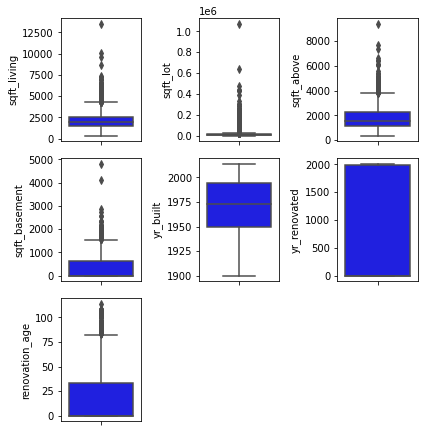

In [451]:
plt.figure(figsize=(6, 8))
for i in range(0, len(numerik)):
    plt.subplot(4, len(numerik)//2, i+1)
    sns.boxplot(y=df[numerik[i]], color='blue', orient='v')
    plt.tight_layout()

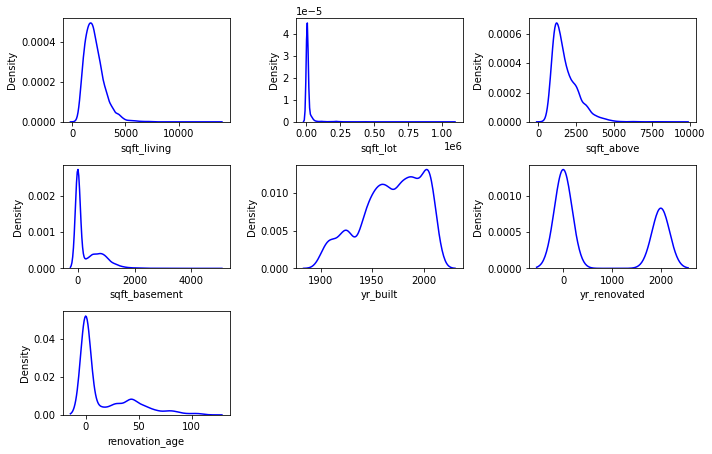

In [452]:
plt.figure(figsize=(10, 8))
for i in range(0, len(numerik)):
    plt.subplot(4, len(numerik)//2, i+1)
    sns.kdeplot(df[numerik[i]], color='blue')
    plt.tight_layout()

### Transformasi
Menggunakan **yeo-johnson**

In [453]:
df.dtypes

date              datetime64[ns]
price                    float64
bedrooms                 float64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
street                    object
city                      object
statezip                  object
country                   object
renovation_age             int64
dtype: object

In [454]:
numerik = df[fitur].columns[df[fitur].columns.str.contains('sqft|yr_|renovation_age', case=False)]
kategorik = [item for item in fitur if item not in numerik]

print('Kolom Numerik:\n', numerik, '\n')
print('Kolom Kategorik:\n', kategorik)

Kolom Numerik:
 Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'renovation_age'],
      dtype='object') 

Kolom Kategorik:
 ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'city']


In [455]:
transformasi = PowerTransformer(method='yeo-johnson')
df[numerik] = transformasi.fit_transform(df[numerik])
df[fitur].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,renovation_age
0,3.0000,1.5000,-0.8558,0.0375,1.5000,0,0,3,-0.4223,-0.8308,-0.5969,1.2802,Shoreline,1.3475
1,5.0000,2.5000,1.4985,0.1896,2.0000,0,4,5,1.6020,1.0512,-1.5127,-0.7813,Seattle,-0.7781
2,3.0000,2.0000,-0.0079,0.4922,1.0000,0,0,4,0.4332,-0.8308,-0.2385,-0.7813,Kent,-0.7781
3,3.0000,2.2500,0.0754,0.0544,1.0000,0,0,4,-1.1654,1.2718,-0.3396,-0.7813,Bellevue,-0.7781
4,4.0000,2.5000,0.0042,0.3534,1.0000,0,0,4,-0.8262,1.2366,0.1179,1.2795,Redmond,1.0557


In [456]:
df[fitur].skew().sort_values(ascending=False)

waterfront       12.1402
view              3.3302
condition         0.8975
bathrooms         0.6151
floors            0.6050
renovation_age    0.5227
yr_renovated      0.4987
bedrooms          0.4708
sqft_basement     0.3825
sqft_above        0.0139
sqft_living       0.0004
sqft_lot         -0.0869
yr_built         -0.0920
dtype: float64

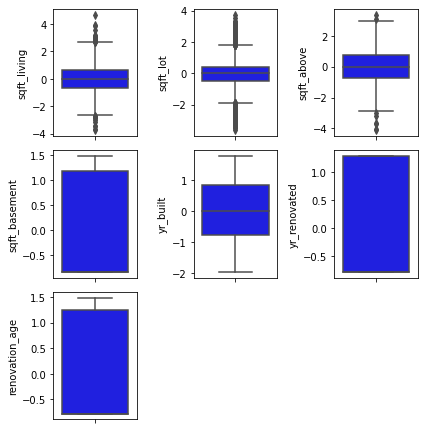

In [457]:
plt.figure(figsize=(6, 8))
for i in range(0, len(numerik)):
    plt.subplot(4, len(numerik)//2, i+1)
    sns.boxplot(y=df[numerik[i]], color='blue', orient='v')
    plt.tight_layout()

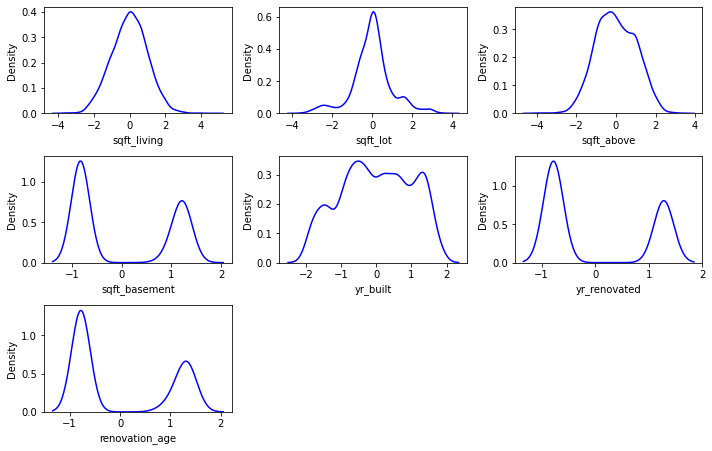

In [458]:
plt.figure(figsize=(10, 8))
for i in range(0, len(numerik)):
    plt.subplot(4, len(numerik)//2, i+1)
    sns.kdeplot(df[numerik[i]], color='blue')
    plt.tight_layout()

### Normalisasi
Menggunakan **RobustScaler**

In [459]:
numerik = df[fitur].columns[df[fitur].columns.str.contains('sqft|yr_|renovation_age', case=False)]
kategorik = [item for item in fitur if item not in numerik]

print('Kolom Numerik:\n', numerik, '\n')
print('Kolom Kategorik:\n', kategorik)

Kolom Numerik:
 Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'renovation_age'],
      dtype='object') 

Kolom Kategorik:
 ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'city']


In [460]:
scaler = RobustScaler()
df[kolom] = scaler.fit_transform(df[kolom])
df[fitur].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,renovation_age
0,3.0000,1.5000,-0.6533,0.0276,1.5000,0.0000,0.0000,3,-0.2535,0.0000,-0.5969,1.2802,Shoreline,1.0453
1,5.0000,2.5000,1.0937,0.1930,2.0000,0.0000,4.0000,5,1.0944,0.9292,-1.5127,-0.7813,Seattle,0.0000
2,3.0000,2.0000,-0.0241,0.5223,1.0000,0.0000,0.0000,4,0.3161,0.0000,-0.2385,-0.7813,Kent,0.0000
3,3.0000,2.2500,0.0377,0.0460,1.0000,0.0000,0.0000,4,-0.7484,1.0381,-0.3396,-0.7813,Bellevue,0.0000
4,4.0000,2.5000,-0.0151,0.3713,1.0000,0.0000,0.0000,4,-0.5225,1.0207,0.1179,1.2795,Redmond,0.9018


In [461]:
df[numerik].describe().loc[['mean', '50%', 'min', 'max']]

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,renovation_age
mean,-0.0182,-0.0132,0.0277,0.4102,0.0000,0.0000,0.3827
50%,0.0000,0.0000,0.0000,0.0000,0.0078,-0.7813,0.0000
min,-2.8098,-3.9606,-2.7170,0.0000,-1.9569,-0.7813,0.0000
max,3.4711,4.0591,2.2790,1.1429,1.7830,1.2808,1.1156


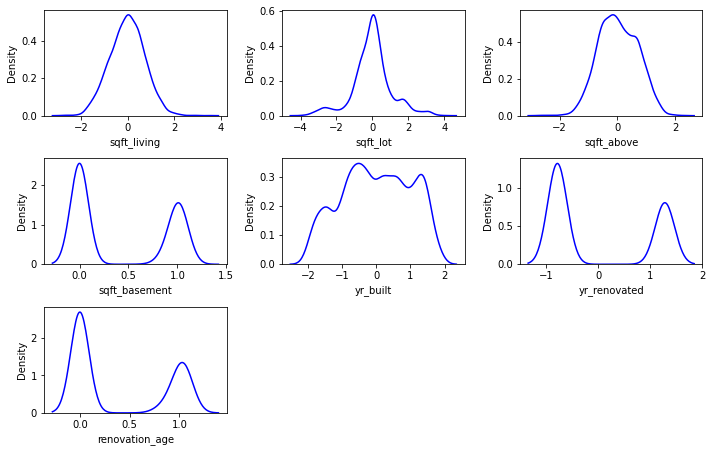

In [462]:
plt.figure(figsize=(10, 8))
for i in range(0, len(numerik)):
    plt.subplot(4, len(numerik)//2, i+1)
    sns.kdeplot(df[numerik[i]], color='blue')
    plt.tight_layout()

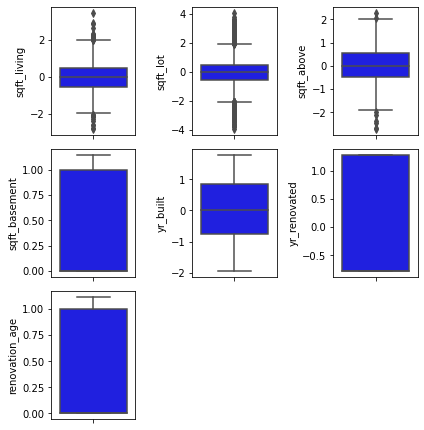

In [463]:
plt.figure(figsize=(6, 8))
for i in range(0, len(numerik)):
    plt.subplot(4, len(numerik)//2, i+1)
    sns.boxplot(y=df[numerik[i]], color='blue', orient='v')
    plt.tight_layout()

### Encoding
Menggunakan **LabelEncoder**

In [464]:
ordinal = OrdinalEncoder()

df['city'] = ordinal.fit_transform(df[['city']])
np.array(sorted(df['city'].unique()))

# kategori_city = sorted(df['city'].unique())
# mapping = {kategori_city[i]: i+1 for i in range(len(kategori_city))}
# df['city'] = df['city'].map(mapping)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43.])

### Simpan Data

In [465]:
df.to_csv(path_or_buf='data/clean_data.csv', index=False)

Data yang sudah pada tahap Preprocessing disimpan pada file CSV yang baru agar data dapat digunakan kembali tanpa harus mengulangi tahapan Preprocessing

# Feature Selection

In [466]:
df_feature_selection = df.copy()
df_hasil = pd.DataFrame(columns=['Model', 'R2 Score'])
df_feature_selection.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,renovation_age
0,2014-05-02,313000.0000,3.0000,1.5000,-0.6533,0.0276,1.5000,0.0000,0.0000,3,-0.2535,0.0000,-0.5969,1.2802,18810 Densmore Ave N,36.0000,WA 98133,USA,1.0453
1,2014-05-02,2384000.0000,5.0000,2.5000,1.0937,0.1930,2.0000,0.0000,4.0000,5,1.0944,0.9292,-1.5127,-0.7813,709 W Blaine St,35.0000,WA 98119,USA,0.0000
2,2014-05-02,342000.0000,3.0000,2.0000,-0.0241,0.5223,1.0000,0.0000,0.0000,4,0.3161,0.0000,-0.2385,-0.7813,26206-26214 143rd Ave SE,18.0000,WA 98042,USA,0.0000
3,2014-05-02,420000.0000,3.0000,2.2500,0.0377,0.0460,1.0000,0.0000,0.0000,4,-0.7484,1.0381,-0.3396,-0.7813,857 170th Pl NE,3.0000,WA 98008,USA,0.0000
4,2014-05-02,550000.0000,4.0000,2.5000,-0.0151,0.3713,1.0000,0.0000,0.0000,4,-0.5225,1.0207,0.1179,1.2795,9105 170th Ave NE,31.0000,WA 98052,USA,0.9018


In [467]:
df_feature_selection.corr()['price'].sort_values(ascending=False)

price             1.0000
sqft_living       0.3871
bathrooms         0.3376
sqft_above        0.3287
view              0.2425
bedrooms          0.2068
floors            0.1537
waterfront        0.1470
sqft_basement     0.1258
sqft_lot          0.0988
condition         0.0415
yr_built          0.0277
city              0.0183
renovation_age   -0.0332
yr_renovated     -0.0337
Name: price, dtype: float64

Menggunakan Algoritma **Random Forest** untuk menentukan fitur yang paling berpengaruh terhadap harga rumah

In [468]:
X = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street'])
y = df_feature_selection["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf_1 = RandomForestRegressor(n_estimators=500, random_state=42)
model_rf_1.fit(X_train, y_train)

print(list(df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street']).columns.sort_values()))
print(f'Hasil Model Score : {model_rf_1.score(X_test, y_test).round(5)*100}%')

df_hasil = df_hasil.append({'Model': 'Random Forest 1', 'R2 Score': model_rf_1.score(X_test, y_test).round(5)*100}, ignore_index=True)

['bathrooms', 'bedrooms', 'city', 'condition', 'floors', 'renovation_age', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront', 'yr_built', 'yr_renovated']
Hasil Model Score : 62.648%


In [469]:
X = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'city'])
y = df_feature_selection["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf_2 = RandomForestRegressor(n_estimators=500, random_state=42)
model_rf_2.fit(X_train, y_train)

print('Tanpa Kolom city')
print(list(df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'city']).columns.sort_values()))
print(f'Hasil Model Score : {model_rf_2.score(X_test, y_test).round(5)*100}%')

df_hasil = df_hasil.append({'Model': 'Random Forest 2 Tanpa Kolom City', 'R2 Score': model_rf_2.score(X_test, y_test).round(5)*100}, ignore_index=True)

Tanpa Kolom city
['bathrooms', 'bedrooms', 'condition', 'floors', 'renovation_age', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront', 'yr_built', 'yr_renovated']
Hasil Model Score : 57.82000000000001%


In [470]:
X = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'yr_renovated', 'yr_built'])
y = df_feature_selection["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf_3 = RandomForestRegressor(n_estimators=500, random_state=42)
model_rf_3.fit(X_train, y_train)

print('Tanpa Kolom yr_renovated dan yr_built')
print(list(df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'yr_renovated', 'yr_built']).columns.sort_values()))
print(f'Hasil Model Score : {model_rf_3.score(X_test, y_test).round(5)*100}%')

df_hasil = df_hasil.append({'Model': 'Random Forest 3 Tanpa Kolom yr_renovated dan yr_built', 'R2 Score': model_rf_3.score(X_test, y_test).round(5)*100}, ignore_index=True)

Tanpa Kolom yr_renovated dan yr_built
['bathrooms', 'bedrooms', 'city', 'condition', 'floors', 'renovation_age', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront']
Hasil Model Score : 61.897000000000006%


In [471]:
X = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'renovation_age'])
y = df_feature_selection["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf_4 = RandomForestRegressor(n_estimators=500, random_state=42)
model_rf_4.fit(X_train, y_train)

print('Tanpa Kolom renovation_age')
print(list(df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'renovation_age']).columns.sort_values()))
print(f'Hasil Model Score : {model_rf_4.score(X_test, y_test).round(5)*100}%')

df_hasil = df_hasil.append({'Model': 'Random Forest 4 Tanpa Kolom renovation_age', 'R2 Score': model_rf_4.score(X_test, y_test).round(5)*100}, ignore_index=True)

Tanpa Kolom renovation_age
['bathrooms', 'bedrooms', 'city', 'condition', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront', 'yr_built', 'yr_renovated']
Hasil Model Score : 62.804%


In [472]:
X = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'renovation_age', 'yr_built'])
y = df_feature_selection["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf_5 = RandomForestRegressor(n_estimators=500, random_state=42)
model_rf_5.fit(X_train, y_train)

print('Tanpa Kolom renovation_age dan yr_built')
print(list(df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'renovation_age', 'yr_built']).columns.sort_values()))
print(f'Hasil Model Score : {model_rf_5.score(X_test, y_test).round(5)*100}%')

df_hasil = df_hasil.append({'Model': 'Random Forest 5 Tanpa Kolom renovation_age dan yr_built', 'R2 Score': model_rf_5.score(X_test, y_test).round(5)*100}, ignore_index=True)

Tanpa Kolom renovation_age dan yr_built
['bathrooms', 'bedrooms', 'city', 'condition', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront', 'yr_renovated']
Hasil Model Score : 61.209%


In [473]:
X = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'renovation_age', 'yr_renovated'])
y = df_feature_selection["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf_6 = RandomForestRegressor(n_estimators=500, random_state=42)
model_rf_6.fit(X_train, y_train)

print('Tanpa Kolom renovation_age dan yr_renovated')
print(list(df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'renovation_age', 'yr_renovated']).columns.sort_values()))
print(f'Hasil Model Score : {model_rf_6.score(X_test, y_test).round(5)*100}%')

df_hasil = df_hasil.append({'Model': 'Random Forest 6 Tanpa Kolom renovation_age dan yr_renovated', 'R2 Score': model_rf_6.score(X_test, y_test).round(5)*100}, ignore_index=True)

Tanpa Kolom renovation_age dan yr_renovated
['bathrooms', 'bedrooms', 'city', 'condition', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront', 'yr_built']
Hasil Model Score : 62.78399999999999%


In [474]:
X = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'yr_renovated', 'renovation_age', 'yr_built'])
y = df_feature_selection["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf_7 = RandomForestRegressor(n_estimators=500, random_state=42)
model_rf_7.fit(X_train, y_train)

print('Tanpa Kolom yr_renovated, renovation_age dan yr_built')
print(list(df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'yr_renovated', 'renovation_age', 'yr_built']).columns.sort_values()))
print(f'Hasil Model Score : {model_rf_7.score(X_test, y_test).round(5)*100}%')

df_hasil = df_hasil.append({'Model': 'Random Forest 7 Tanpa Kolom yr_renovated, renovation_age dan yr_built', 'R2 Score': model_rf_7.score(X_test, y_test).round(5)*100}, ignore_index=True)

Tanpa Kolom yr_renovated, renovation_age dan yr_built
['bathrooms', 'bedrooms', 'city', 'condition', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront']
Hasil Model Score : 61.29599999999999%


In [475]:
X = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'yr_renovated', 'renovation_age', 'yr_built', 'city'])
y = df_feature_selection["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf_8 = RandomForestRegressor(n_estimators=500, random_state=42)
model_rf_8.fit(X_train, y_train)

print('Tanpa Kolom yr_renovated, renovation_age, yr_built dan city')
print(list(df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'yr_renovated', 'renovation_age', 'yr_built', 'city']).columns.sort_values()))
print(f'Hasil Model Score : {model_rf_8.score(X_test, y_test).round(5)*100}%')

df_hasil = df_hasil.append({'Model': 'Random Forest 8 Tanpa Kolom yr_renovated, renovation_age, yr_built dan city', 'R2 Score': model_rf_8.score(X_test, y_test).round(5)*100}, ignore_index=True)

Tanpa Kolom yr_renovated, renovation_age, yr_built dan city
['bathrooms', 'bedrooms', 'condition', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront']
Hasil Model Score : 55.132999999999996%


Kolom renovation age tidak memiliki pengaruh yang signifikan terhadap harga rumah, maka kolom tersebut tidak digunakan pada tahap selanjutnya

In [476]:
df_hasil.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
3,Random Forest 4 Tanpa Kolom renovation_age,62.8040
5,Random Forest 6 Tanpa Kolom renovation_age dan...,62.7840
0,Random Forest 1,62.6480
2,Random Forest 3 Tanpa Kolom yr_renovated dan y...,61.8970
6,"Random Forest 7 Tanpa Kolom yr_renovated, reno...",61.2960
4,Random Forest 5 Tanpa Kolom renovation_age dan...,61.2090
1,Random Forest 2 Tanpa Kolom City,57.8200
7,"Random Forest 8 Tanpa Kolom yr_renovated, reno...",55.1330


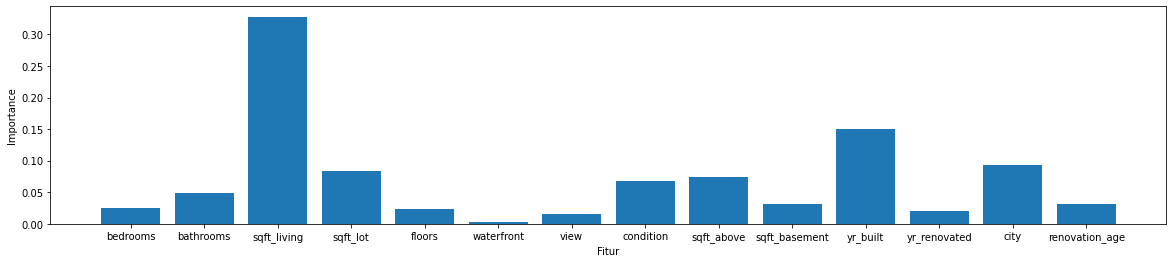

In [477]:
feature_importance = model_rf_1.feature_importances_
fitur = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street']).columns

# Visualisasi feature importance
plt.figure(figsize=(20, 4))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), fitur)
plt.xlabel('Fitur')
plt.ylabel('Importance')
plt.show()

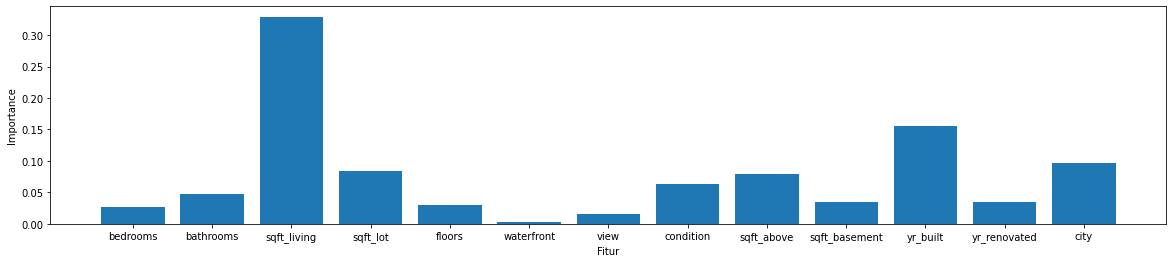

In [478]:
feature_importance = model_rf_4.feature_importances_
fitur = df_feature_selection.drop(columns=['price', 'date', 'statezip', 'country', 'street', 'renovation_age']).columns

# Visualisasi feature importance
plt.figure(figsize=(20, 4))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), fitur)
plt.xlabel('Fitur')
plt.ylabel('Importance')
plt.show()

# Pemodelan

### Persiapan Data

In [479]:
filter = list(filter_price) + list(filter_renovation)
len(filter)

242

Membuang data berdasarkan tahapan preprocessing yang sudah dilakukan sebelumnya

In [480]:
df_model.drop(index=filter, inplace=True)
df_model.reset_index(drop=True, inplace=True)
df_model.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0000,3.0000,1.5000,1340,7912,1.5000,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0000,5.0000,2.5000,3650,9050,2.0000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0000,3.0000,2.0000,1930,11947,1.0000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0000,3.0000,2.2500,2000,8030,1.0000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0000,4.0000,2.5000,1940,10500,1.0000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Feature Construction Function

In [481]:
fitur = df_model.drop(columns=['price', 'date', 'statezip', 'country', 'street']).columns
numerik = fitur[fitur.str.contains('sqft|yr', case=False)]
kategorik = df_model[fitur].select_dtypes(include=['object']).columns

print('Kolom Fitur:', '\n', fitur, '\n')
print('Kolom Kategorik:', '\n', kategorik, '\n')
print('Kolom Numerik:', '\n', numerik)

Kolom Fitur: 
 Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object') 

Kolom Kategorik: 
 Index(['city'], dtype='object') 

Kolom Numerik: 
 Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated'],
      dtype='object')


In [482]:
X = df_model[fitur]
y = df_model["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('scaling', Pipeline([
            ('transformasi', PowerTransformer(method='yeo-johnson')),
            ('scaling', RobustScaler())
        ]), numerik),
        ('encoding', OrdinalEncoder(), kategorik),
    ], remainder='passthrough')

# indeks_numerik = [list(fitur).index(kolom) for kolom in numerik]

# def feature_construction(Data):
#     kategori_city = sorted(Data['city'].unique())
#     mapping = {kategori_city[i]: i+1 for i in range(len(kategori_city))}
#     Data['city'] = Data['city'].map(mapping)

#     return Data

# feature_engineering = ColumnTransformer(transformers=[
#     ('feature_construction', FunctionTransformer(func=feature_construction, validate=False), fitur)], remainder='passthrough')

In [483]:
hasil_evaluasi = pd.DataFrame()

def evaluation(model, X_train, X_test, y_train, y_test, algoritma):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    dict_eval = {
        'Algoritma': [algoritma],
        'R2 Train': [r2_train],
        'R2 Test': [r2_test],
        'RMSE Train': [rmse_train],
        'RMSE Test': [rmse_test],
        'MAE Train': [mae_train],
        'MAE Test': [mae_test],
        'MSE Train': [mse_train],
        'MSE Test': [mse_test] 
    }

    evaluasi = pd.DataFrame(dict_eval)
    return evaluasi

### Random Forest

In [484]:
model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('algoritma', RandomForestRegressor(n_estimators=500, random_state=42))
])

model_rf.fit(X_train, y_train)
print(f'Hasil Model Test  Score : {model_rf.score(X_test, y_test).round(5)*100}%')
print(f'Hasil Model Train Score : {model_rf.score(X_train, y_train).round(5)*100}%')

Hasil Model Test  Score : 62.89900000000001%
Hasil Model Train Score : 86.02300000000001%


In [485]:
data = pd.DataFrame({
    'bathrooms': [2.5000],
    'bedrooms': [4.0000],
    'city': ['Renton'],
    'condition': [3],
    'floors': [2.0000],
    'sqft_above': [3070],
    'sqft_basement': [0],
    'sqft_living': [3070],
    'sqft_lot': [6432],
    'view': [0],
    'waterfront': [0],
    'yr_built': [2006],
    'yr_renovated': [0]
})

hasil = model_rf.predict(data)
print(f'Data Aktual   : [{y_train.iloc[0]}]')
print(f'Data Prediksi : {hasil}')

score = evaluation(model_rf, X_train, X_test, y_train, y_test, 'Random Forest')
hasil_evaluasi = pd.concat([hasil_evaluasi, score], ignore_index=True)

Data Aktual   : [462000.0]
Data Prediksi : [510719.53466667]


### Linear Regression

In [486]:
model_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('algoritma', LinearRegression())
])

model_lr.fit(X_train, y_train)
print(f'Hasil Model Test  Score : {model_lr.score(X_test, y_test).round(5)*100}%')
print(f'Hasil Model Train Score : {model_lr.score(X_train, y_train).round(5)*100}%')

Hasil Model Test  Score : 45.97%
Hasil Model Train Score : 16.543%


In [487]:
data = pd.DataFrame({
    'bathrooms': [2.5000],
    'bedrooms': [4.0000],
    'city': ['Renton'],
    'condition': [3],
    'floors': [2.0000],
    'sqft_above': [3070],
    'sqft_basement': [0],
    'sqft_living': [3070],
    'sqft_lot': [6432],
    'view': [0],
    'waterfront': [0],
    'yr_built': [2006],
    'yr_renovated': [0]
})

hasil = model_lr.predict(data)
print(f'Data Aktual   : [{y_train.iloc[0]}]')
print(f'Data Prediksi : {hasil}')

score = evaluation(model_lr, X_train, X_test, y_train, y_test, 'Linear Regression')
hasil_evaluasi = pd.concat([hasil_evaluasi, score], ignore_index=True)

Data Aktual   : [462000.0]
Data Prediksi : [677990.66172642]


### Elastic Net

In [488]:
model_en = Pipeline([
    ('preprocessor', preprocessor),
    ('algoritma', ElasticNet(random_state=42))
])

model_en.fit(X_train, y_train)
print(f'Hasil Model Test  Score : {model_en.score(X_test, y_test).round(5)*100}%')
print(f'Hasil Model Train Score : {model_en.score(X_train, y_train).round(5)*100}%')

Hasil Model Test  Score : 35.382000000000005%
Hasil Model Train Score : 14.305000000000001%


In [489]:
data = pd.DataFrame({
    'bathrooms': [2.5000],
    'bedrooms': [4.0000],
    'city': ['Renton'],
    'condition': [3],
    'floors': [2.0000],
    'sqft_above': [3070],
    'sqft_basement': [0],
    'sqft_living': [3070],
    'sqft_lot': [6432],
    'view': [0],
    'waterfront': [0],
    'yr_built': [2006],
    'yr_renovated': [0]
})

hasil = model_en.predict(data)
print(f'Data Aktual   : [{y_train.iloc[0]}]')
print(f'Data Prediksi : {hasil}')

score = evaluation(model_en, X_train, X_test, y_train, y_test, 'Elastic Net')
hasil_evaluasi = pd.concat([hasil_evaluasi, score], ignore_index=True)

Data Aktual   : [462000.0]
Data Prediksi : [680354.81177964]


### Support Vector Machine

In [490]:
model_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('algoritma', SVR(kernel='rbf'))
])

model_svr.fit(X_train, y_train)
print(f'Hasil Model Test  Score : {model_svr.score(X_test, y_test).round(5)*100}%')
print(f'Hasil Model Train Score : {model_svr.score(X_train, y_train).round(5)*100}%')

Hasil Model Test  Score : -4.942%
Hasil Model Train Score : -2.4979999999999998%


In [491]:
data = pd.DataFrame({
    'bathrooms': [2.5000],
    'bedrooms': [4.0000],
    'city': ['Renton'],
    'condition': [3],
    'floors': [2.0000],
    'sqft_above': [3070],
    'sqft_basement': [0],
    'sqft_living': [3070],
    'sqft_lot': [6432],
    'view': [0],
    'waterfront': [0],
    'yr_built': [2006],
    'yr_renovated': [0]
})

hasil = model_svr.predict(data)
print(f'Data Aktual   : [{y_train.iloc[0]}]')
print(f'Data Prediksi : {hasil}')

score = evaluation(model_svr, X_train, X_test, y_train, y_test, 'Support Vector Machine')
hasil_evaluasi = pd.concat([hasil_evaluasi, score], ignore_index=True)

Data Aktual   : [462000.0]
Data Prediksi : [461002.76196748]


### Ridge

In [492]:
model_rg = Pipeline([
    ('preprocessor', preprocessor),
    ('algoritma', Ridge(random_state=42))
])

model_rg.fit(X_train, y_train)
print(f'Hasil Model Test  Score : {model_rg.score(X_test, y_test).round(5)*100}%')
print(f'Hasil Model Train Score : {model_rg.score(X_train, y_train).round(5)*100}%')

Hasil Model Test  Score : 45.857%
Hasil Model Train Score : 16.543%


In [493]:
data = pd.DataFrame({
    'bathrooms': [2.5000],
    'bedrooms': [4.0000],
    'city': ['Renton'],
    'condition': [3],
    'floors': [2.0000],
    'sqft_above': [3070],
    'sqft_basement': [0],
    'sqft_living': [3070],
    'sqft_lot': [6432],
    'view': [0],
    'waterfront': [0],
    'yr_built': [2006],
    'yr_renovated': [0]
})

hasil = model_rg.predict(data)
print(f'Data Aktual   : [{y_train.iloc[0]}]')
print(f'Data Prediksi : {hasil}')

score = evaluation(model_rg, X_train, X_test, y_train, y_test, 'Ridge')
hasil_evaluasi = pd.concat([hasil_evaluasi, score], ignore_index=True)

Data Aktual   : [462000.0]
Data Prediksi : [677952.81919627]


### Lasso

In [494]:
model_ls = Pipeline([
    ('preprocessor', preprocessor),
    ('algoritma', Lasso(random_state=42))
])

model_ls.fit(X_train, y_train)
print(f'Hasil Model Test  Score : {model_ls.score(X_test, y_test).round(5)*100}%')
print(f'Hasil Model Train Score : {model_ls.score(X_train, y_train).round(5)*100}%')

Hasil Model Test  Score : 45.967%
Hasil Model Train Score : 16.543%


In [495]:
data = pd.DataFrame({
    'bathrooms': [2.5000],
    'bedrooms': [4.0000],
    'city': ['Renton'],
    'condition': [3],
    'floors': [2.0000],
    'sqft_above': [3070],
    'sqft_basement': [0],
    'sqft_living': [3070],
    'sqft_lot': [6432],
    'view': [0],
    'waterfront': [0],
    'yr_built': [2006],
    'yr_renovated': [0]
})

hasil = model_ls.predict(data)
print(f'Data Aktual   : [{y_train.iloc[0]}]')
print(f'Data Prediksi : {hasil}')

score = evaluation(model_ls, X_train, X_test, y_train, y_test, 'Lasso')
hasil_evaluasi = pd.concat([hasil_evaluasi, score], ignore_index=True)

Data Aktual   : [462000.0]
Data Prediksi : [677992.47977051]


### Extreme Gradient Boosting

In [496]:
model_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('algoritma', XGBRegressor(n_jobs=-1, random_state=42, n_estimators=500, objective='reg:squarederror'))
])

model_xgb.fit(X_train, y_train)
print(f'Hasil Model Test  Score : {model_xgb.score(X_test, y_test).round(5)*100}%')
print(f'Hasil Model Train Score : {model_xgb.score(X_train, y_train).round(5)*100}%')

Hasil Model Test  Score : 50.134%
Hasil Model Train Score : 99.992%


In [497]:
data = pd.DataFrame({
    'bathrooms': [2.5000],
    'bedrooms': [4.0000],
    'city': ['Renton'],
    'condition': [3],
    'floors': [2.0000],
    'sqft_above': [3070],
    'sqft_basement': [0],
    'sqft_living': [3070],
    'sqft_lot': [6432],
    'view': [0],
    'waterfront': [0],
    'yr_built': [2006],
    'yr_renovated': [0]
})

hasil = model_xgb.predict(data)
print(f'Data Aktual   : [{y_train.iloc[0]}]')
print(f'Data Prediksi : {hasil}')

score = evaluation(model_xgb, X_train, X_test, y_train, y_test, 'Extreme Gradient Boosting')
hasil_evaluasi = pd.concat([hasil_evaluasi, score], ignore_index=True)

Data Aktual   : [462000.0]
Data Prediksi : [475091.16]


### Gradient Boosting

In [498]:
model_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('algoritma', GradientBoostingRegressor(random_state=42, n_estimators=500, max_features=None))
])

model_gb.fit(X_train, y_train)
print(f'Hasil Model Test  Score : {model_gb.score(X_test, y_test).round(5)*100}%')
print(f'Hasil Model Train Score : {model_gb.score(X_train, y_train).round(5)*100}%')

Hasil Model Test  Score : 40.483999999999995%
Hasil Model Train Score : 94.935%


In [499]:
data = pd.DataFrame({
    'bathrooms': [2.5000],
    'bedrooms': [4.0000],
    'city': ['Renton'],
    'condition': [3],
    'floors': [2.0000],
    'sqft_above': [3070],
    'sqft_basement': [0],
    'sqft_living': [3070],
    'sqft_lot': [6432],
    'view': [0],
    'waterfront': [0],
    'yr_built': [2006],
    'yr_renovated': [0]
})

hasil = model_gb.predict(data)
print(f'Data Aktual   : [{y_train.iloc[0]}]')
print(f'Data Prediksi : {hasil}')

score = evaluation(model_gb, X_train, X_test, y_train, y_test, 'Gradient Boosting')
hasil_evaluasi = pd.concat([hasil_evaluasi, score], ignore_index=True)

Data Aktual   : [462000.0]
Data Prediksi : [557702.11036817]


### Extra Trees

In [500]:
model_xt = Pipeline([
    ('preprocessor', preprocessor),
    ('algoritma', ExtraTreesRegressor(random_state=42, n_estimators=500, max_features=None))
])

model_xt.fit(X_train, y_train)
print(f'Hasil Model Test  Score : {model_xt.score(X_test, y_test).round(5)*100}%')
print(f'Hasil Model Train Score : {model_xt.score(X_train, y_train).round(5)*100}%')

Hasil Model Test  Score : 56.629%
Hasil Model Train Score : 100.0%


In [501]:
data = pd.DataFrame({
    'bathrooms': [2.5000],
    'bedrooms': [4.0000],
    'city': ['Renton'],
    'condition': [3],
    'floors': [2.0000],
    'sqft_above': [3070],
    'sqft_basement': [0],
    'sqft_living': [3070],
    'sqft_lot': [6432],
    'view': [0],
    'waterfront': [0],
    'yr_built': [2006],
    'yr_renovated': [0]
})

hasil = model_xt.predict(data)
print(f'Data Aktual   : [{y_train.iloc[0]}]')
print(f'Data Prediksi : {hasil}')

score = evaluation(model_xt, X_train, X_test, y_train, y_test, 'Extra Trees')
hasil_evaluasi = pd.concat([hasil_evaluasi, score], ignore_index=True)

Data Aktual   : [462000.0]
Data Prediksi : [462000.]


# Evaluasi Hasil Model

In [502]:
hasil_evaluasi.sort_values(by=['R2 Test', 'R2 Train'], ascending=False)

,Algoritma,R2 Train,R2 Test,RMSE Train,RMSE Test,MAE Train,MAE Test,MSE Train,MSE Test
0,Random Forest,0.8602,0.6290,224766.1806,264174.2095,56630.3626,132470.2046,50519835947.6720,69788012984.0170
8,Extra Trees,1.0000,0.5663,739.5989,285624.8869,24.1021,146001.0271,547006.5978,81581576020.8491
6,Extreme Gradient Boosting,0.9999,0.5013,5292.8619,306264.1967,3475.3673,140743.6383,28014386.6303,93797758155.1134
1,Linear Regression,0.1654,0.4597,549235.2749,318797.9412,174251.6810,172797.1563,301659387219.4135,101632127302.8905
5,Lasso,0.1654,0.4597,549235.2752,318804.0774,174251.1703,172797.2699,301659387479.1990,101636039791.5230
4,Ridge,0.1654,0.4586,549235.7405,319129.4258,174245.5763,172831.5924,301659898657.0486,101843590431.3093
7,Gradient Boosting,0.9493,0.4048,135312.4865,334590.2327,86061.2833,139848.2706,18309468989.3561,111950623794.1043
2,Elastic Net,0.1430,0.3538,556552.4854,348636.0443,182369.0142,178558.0690,309750669049.0798,121547091396.3836
3,Support Vector Machine,-0.0250,-0.0494,608675.2535,444294.0339,234878.1779,232729.2995,370485564183.3920,197397188548.7747


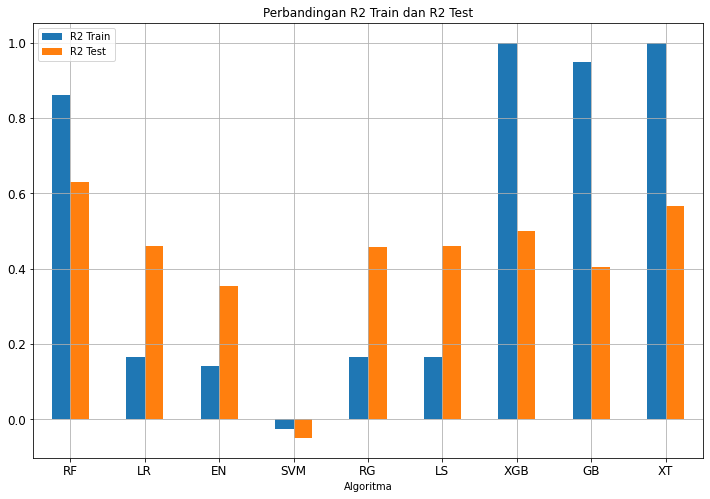

In [503]:
hasil_evaluasi.plot(kind='bar', figsize=(12, 8), x='Algoritma', y=['R2 Train', 'R2 Test'], rot=0, fontsize=12, grid=True, title='Perbandingan R2 Train dan R2 Test')
plt.xticks(ticks=range(0, len(hasil_evaluasi['Algoritma'])), labels=['RF', 'LR', 'EN', 'SVM', 'RG', 'LS', 'XGB', 'GB', 'XT']);

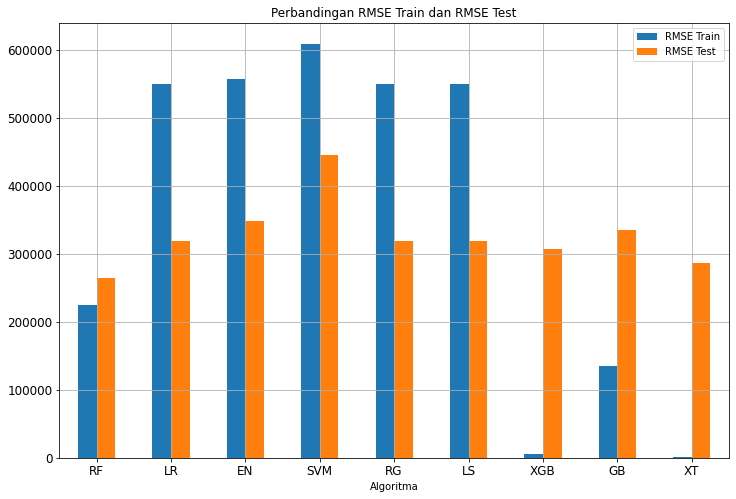

In [504]:
hasil_evaluasi.plot(kind='bar', figsize=(12, 8), x='Algoritma', y=['RMSE Train', 'RMSE Test'], rot=0, fontsize=12, grid=True, title='Perbandingan RMSE Train dan RMSE Test')
plt.xticks(ticks=range(0, len(hasil_evaluasi['Algoritma'])), labels=['RF', 'LR', 'EN', 'SVM', 'RG', 'LS', 'XGB', 'GB', 'XT']);

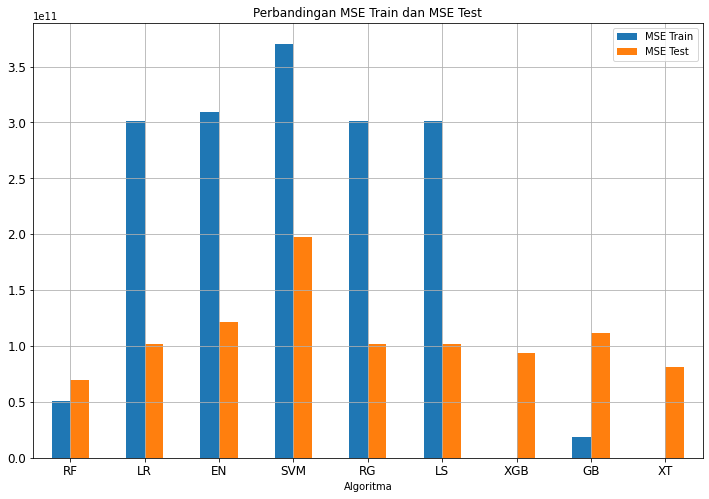

In [505]:
hasil_evaluasi.plot(kind='bar', figsize=(12, 8), x='Algoritma', y=['MSE Train', 'MSE Test'], rot=0, fontsize=12, grid=True, title='Perbandingan MSE Train dan MSE Test')
plt.xticks(ticks=range(0, len(hasil_evaluasi['Algoritma'])), labels=['RF', 'LR', 'EN', 'SVM', 'RG', 'LS', 'XGB', 'GB', 'XT']);

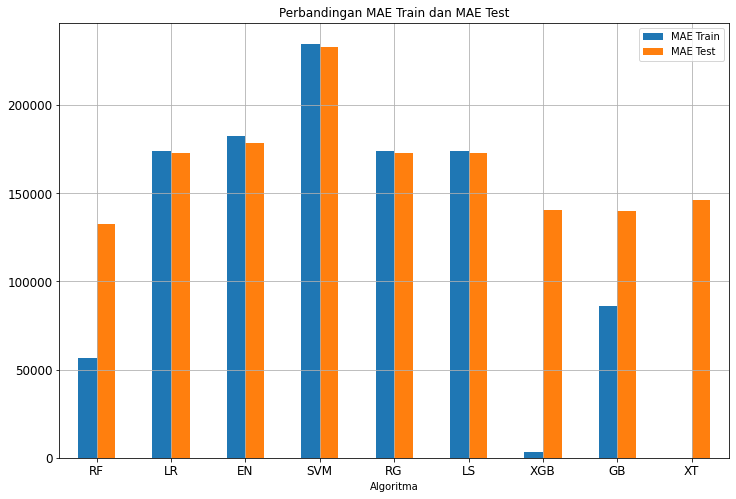

In [506]:
hasil_evaluasi.plot(kind='bar', figsize=(12, 8), x='Algoritma', y=['MAE Train', 'MAE Test'], rot=0, fontsize=12, grid=True, title='Perbandingan MAE Train dan MAE Test')
plt.xticks(ticks=range(0, len(hasil_evaluasi['Algoritma'])), labels=['RF', 'LR', 'EN', 'SVM', 'RG', 'LS', 'XGB', 'GB', 'XT']);

Hasil evaluasi model prediksi terbaik didapatkan oleh model **Random Forest**
- Nilai **R2 Test Score** sebesar **62.90%**
- Nilai **R2 Train Score** sebesar **86.02%**	

# Feature Importance

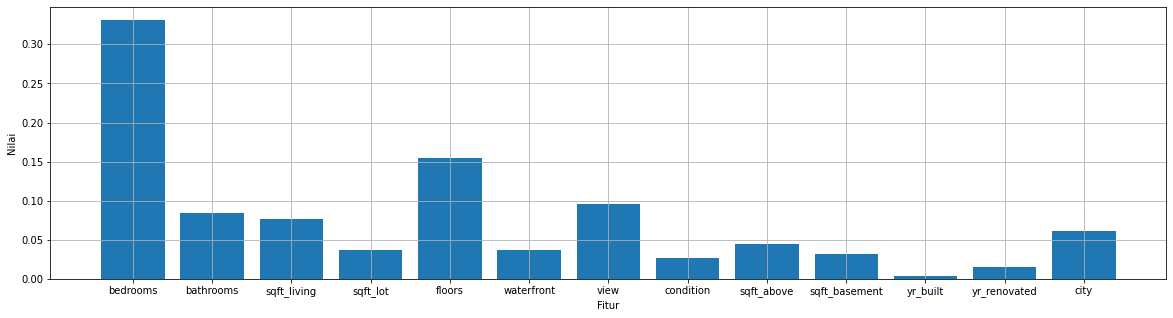

In [507]:
feature_importance = model_rf[-1].feature_importances_

# Visualisasi feature importance
plt.figure(figsize=(20, 5))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), fitur)
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.grid(True)
plt.show()